In [84]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [85]:
train_df = pd.read_csv('database/train.csv', index_col=0)
test_df = pd.read_csv('database/test.csv', index_col=0)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Train Test Split

In [86]:
original_train_df = train_df.drop(columns=['id'])
test_df = test_df.drop(columns=['id'])


In [87]:
train_df, validation_df = train_test_split(original_train_df,test_size= 0.25, stratify=original_train_df['satisfaction'])

print('original_train_df: ',len(original_train_df))
print('train_df: ', len(train_df), "validation_df:", len(validation_df))
print('train_df: ', len(train_df)/len(original_train_df), "validation_df:", len(validation_df)/len(original_train_df))

original_train_df:  103904
train_df:  77928 validation_df: 25976
train_df:  0.75 validation_df: 0.25


In [88]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
31243,Female,Loyal Customer,36,Business travel,Eco,900,5,4,4,4,...,5,2,5,4,4,5,5,88,62.0,satisfied
86682,Male,Loyal Customer,54,Business travel,Business,2853,5,5,5,5,...,5,5,5,5,4,5,4,15,10.0,satisfied
6914,Male,disloyal Customer,24,Business travel,Eco,641,1,1,1,1,...,1,1,3,1,2,1,1,0,0.0,neutral or dissatisfied
61586,Male,disloyal Customer,39,Business travel,Eco,594,2,2,2,3,...,3,2,1,3,4,3,3,0,0.0,neutral or dissatisfied
102050,Female,Loyal Customer,19,Personal Travel,Eco,861,2,4,2,2,...,1,4,5,4,5,4,1,26,18.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96565,Male,Loyal Customer,58,Business travel,Business,3069,5,5,5,5,...,5,5,5,5,3,5,5,1,18.0,satisfied
34600,Male,disloyal Customer,25,Business travel,Business,356,4,5,4,3,...,2,3,3,4,4,4,2,0,0.0,neutral or dissatisfied
78466,Male,disloyal Customer,24,Business travel,Business,432,5,5,5,3,...,3,3,2,5,4,4,3,0,0.0,satisfied
70445,Male,disloyal Customer,45,Business travel,Business,370,4,4,4,3,...,5,5,3,4,5,4,5,0,0.0,satisfied


# Outliers

C:\Users\Lucca\AppData\Local\Temp\ipykernel_8928\354003631.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[36. 54. 24. ... 24. 45. 20.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, cols] = df_sub.where(lim, np.nan)
C:\Users\Lucca\AppData\Local\Temp\ipykernel_8928\354003631.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 900. 2853.  641. ...  432.  370.   67.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, cols] = df_sub.where(lim, np.nan)
C:\Users\Lucca\AppData\Local\Temp\ipykernel_8928\354003631.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5. 5. 1. ... 4. 4. 4.]' has dtype incompatible with int64, please explicitly cast to a compatible 

<Axes: >

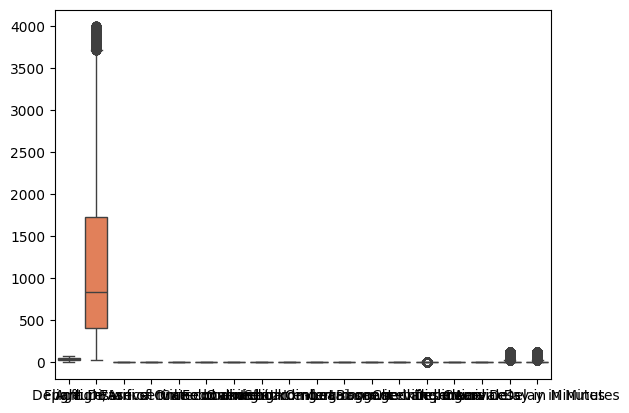

In [89]:
cols = train_df.select_dtypes('number').columns  
df_sub = train_df.loc[:, cols]

# OPTION 1: z-score filter: z-score < 3
lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

# replace outliers with nan
train_df.loc[:, cols] = df_sub.where(lim, np.nan)

train_df.dropna(how='any', subset=cols, inplace=True)

sns.boxplot(data=train_df)

# Missing Values

In [90]:
# sns.heatmap(train_df.isnull(), cbar=False)
columns = train_df.columns[train_df.isnull().any()]
train_df[columns] = train_df[columns].fillna(train_df[columns].median())
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [91]:
# sns.heatmap(validation_df.isnull(), cbar=False)
columns = validation_df.columns[validation_df.isnull().any()]
validation_df[columns] = validation_df[columns].fillna(validation_df[columns].median())
validation_df.columns[validation_df.isnull().any()]

Index([], dtype='object')

# OverSampling

In [92]:
def overSampling(x, y):
  ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
  )
  return ros.fit_resample(x,y)

def printClassDistributionRate(y):
  print('total: ',len(y))
  print('satisfied: ', len(y[y['satisfaction'] == 'satisfied']), ' not satisfied: ', len(y[y['satisfaction'] != 'satisfied']))
  print('satisfied: ', len(y[y['satisfaction'] == 'satisfied'])/len(y), ' not satisfied: ', len(y[y['satisfaction'] != 'satisfied'])/len(y), '\n')

In [93]:
x_train_df = train_df.drop(columns='satisfaction')
y_train_df = train_df[['satisfaction']]

printClassDistributionRate(y_train_df)

x_train_df, y_train_df = overSampling(x_train_df, y_train_df )

printClassDistributionRate(y_train_df)

total:  75756
satisfied:  32972  not satisfied:  42784
satisfied:  0.435239452980622  not satisfied:  0.5647605470193781 

total:  85568
satisfied:  42784  not satisfied:  42784
satisfied:  0.5  not satisfied:  0.5 



In [94]:
x_validation_df = validation_df.drop(columns='satisfaction')
y_validation_df = validation_df[['satisfaction']]

printClassDistributionRate(y_validation_df)

x_validation_df, y_validation_df = overSampling(x_validation_df, y_validation_df )

printClassDistributionRate(y_validation_df)

total:  25976
satisfied:  11256  not satisfied:  14720
satisfied:  0.43332306744687404  not satisfied:  0.566676932553126 

total:  29440
satisfied:  14720  not satisfied:  14720
satisfied:  0.5  not satisfied:  0.5 



# One Hot Enconding

In [95]:
encode_columns = ['Gender', 'Type of Travel']
x_validation_df = pd.get_dummies(x_validation_df, columns=encode_columns, drop_first=True)
x_train_df = pd.get_dummies(x_train_df, columns=encode_columns, drop_first=True)

# Correlation Matrix

In [96]:
corr = x_train_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

ValueError: could not convert string to float: 'Loyal Customer'